# 一、读取数据

In [1]:
import pandas as pd

In [2]:
# 分文件读取
def read_actionData(filepath,size=10000):
    '''
    filepath：文件路径
    size：数据行数
    '''
    df = pd.read_csv(filepath, header=0, iterator=True)
    chunks = []
    loop = True
    
    while loop:
        try:
            chunk = df.get_chunk(size)[['user_id', 'sku_id', 'type', 'time', 'cate']]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print('Iteration is stopped')
            
    df_ac = pd.concat(chunks, ignore_index=True)
    
    return df_ac


# 将多个表的数据合并到一起
df_ac = []
df_ac.append(read_actionData(filepath='./data/Data_Action_201602.csv'))
df_ac.append(read_actionData(filepath='./data/Data_Action_201603.csv'))
df_ac.append(read_actionData(filepath='./data/Data_Action_201604.csv'))

df_ac = pd.concat(df_ac, ignore_index=True)
df_ac

Iteration is stopped
Iteration is stopped
Iteration is stopped


,user_id,sku_id,type,time,cate
0,266079.0,138778,1,2016-01-31 23:59:02,8
1,266079.0,138778,6,2016-01-31 23:59:03,8
2,200719.0,61226,1,2016-01-31 23:59:07,8
3,200719.0,61226,6,2016-01-31 23:59:08,8
4,263587.0,72348,1,2016-01-31 23:59:08,5
...,...,...,...,...,...
50601731,236482.0,7199,6,2016-04-15 23:59:57,4
50601732,236482.0,7199,6,2016-04-15 23:59:57,4
50601733,228530.0,85780,6,2016-04-15 23:59:58,5
50601734,228530.0,85780,6,2016-04-15 23:59:58,5


# 二、数据清洗

In [4]:
df_ac.describe()

,user_id,sku_id,type,cate
count,5.060174e+07,5.060174e+07,5.060174e+07,5.060174e+07
mean,2.512444e+05,8.340089e+04,4.059689e+00,6.548271e+00
std,3.002979e+04,4.966677e+04,2.417952e+00,1.780178e+00
min,2.000010e+05,2.000000e+00,1.000000e+00,4.000000e+00
25%,2.254920e+05,4.033600e+04,1.000000e+00,5.000000e+00
50%,2.497030e+05,7.961600e+04,6.000000e+00,7.000000e+00
75%,2.771030e+05,1.267910e+05,6.000000e+00,8.000000e+00
max,3.053210e+05,1.712250e+05,6.000000e+00,1.100000e+01


In [5]:
df_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50601736 entries, 0 to 50601735
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   sku_id   int64  
 2   type     int64  
 3   time     object 
 4   cate     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ GB


In [6]:
df_ac.count()

user_id    50601736
sku_id     50601736
type       50601736
time       50601736
cate       50601736
dtype: int64

# 三、数据分析

## 1.找到高潜用户

In [7]:
# 找到type为4的用户（下单用户）
df_ac_order_user = df_ac[df_ac['type']==4]
df_ac_order_user

,user_id,sku_id,type,time,cate
351,269365.0,166345,4,2016-02-01 00:01:00,9
649,235443.0,36692,4,2016-02-01 00:02:00,4
980,247689.0,9112,4,2016-02-01 00:03:00,5
1719,273959.0,102034,4,2016-02-01 00:05:00,5
2153,226791.0,163550,4,2016-02-01 00:06:00,4
...,...,...,...,...,...
50597077,242683.0,161265,4,2016-04-15 23:53:00,8
50597721,215804.0,157750,4,2016-04-15 23:54:00,5
50599086,275840.0,18412,4,2016-04-15 23:56:00,8
50600374,291147.0,70491,4,2016-04-15 23:58:00,6


In [21]:
# 2.每类商品购买比
cate_count = df_ac_order_user.groupby('cate').count()
print(cate_count)
cate_count['rate'] = [i/df_ac_order_user.shape[0] for i in cate_count['time'].values]
cate_count

      user_id  sku_id   type   time
cate                               
4        9326    9326   9326   9326
5        8138    8138   8138   8138
6        6982    6982   6982   6982
7        6214    6214   6214   6214
8       13281   13281  13281  13281
9        4104    4104   4104   4104
10        189     189    189    189
11         18      18     18     18


,user_id,sku_id,type,time,rate
cate,,,,,
4,9326,9326,9326,9326,0.193277
5,8138,8138,8138,8138,0.168656
6,6982,6982,6982,6982,0.144699
7,6214,6214,6214,6214,0.128782
8,13281,13281,13281,13281,0.275242
9,4104,4104,4104,4104,0.085053
10,189,189,189,189,0.003917
11,18,18,18,18,0.000373


In [20]:
cate_count['time']
print(type(cate_count['time'].values))

<class 'numpy.ndarray'>


In [23]:
# 3.分析cate4
data_cate4 = df_ac_order_user[df_ac_order_user['cate']==4]
data_cate4

,user_id,sku_id,type,time,cate
649,235443.0,36692,4,2016-02-01 00:02:00,4
2153,226791.0,163550,4,2016-02-01 00:06:00,4
3210,280086.0,79616,4,2016-02-01 00:09:00,4
3568,301854.0,13891,4,2016-02-01 00:10:00,4
3569,301854.0,13891,4,2016-02-01 00:10:00,4
...,...,...,...,...,...
50417513,203988.0,138037,4,2016-04-15 21:14:00,4
50456748,284524.0,141954,4,2016-04-15 21:48:00,4
50501527,240526.0,70936,4,2016-04-15 22:23:00,4
50535758,294379.0,129598,4,2016-04-15 22:50:00,4


In [24]:
#  4.用户最后购买时间
def get_last_order(user):
    return user.time.max()

last_order_time = data_cate4.groupby('user_id').apply(get_last_order)
last_order_time

user_id
200005.0    2016-02-23 23:00:00
200017.0    2016-03-13 14:13:00
200053.0    2016-04-13 20:16:00
200054.0    2016-04-14 08:22:00
200077.0    2016-03-26 14:32:00
                   ...         
305149.0    2016-04-14 00:01:00
305193.0    2016-04-08 08:05:00
305239.0    2016-04-01 14:42:00
305246.0    2016-03-07 11:42:00
305296.0    2016-04-01 11:41:00
Length: 7466, dtype: object

In [25]:
#  5.用户第一次下单时间
def get_first_order(user):
    return user.time.min()

first_order_time = data_cate4.groupby('user_id').apply(get_first_order)
first_order_time

user_id
200005.0    2016-02-23 23:00:00
200017.0    2016-03-13 14:13:00
200053.0    2016-04-13 20:16:00
200054.0    2016-04-14 08:22:00
200077.0    2016-03-15 11:05:00
                   ...         
305149.0    2016-04-14 00:01:00
305193.0    2016-03-15 16:15:00
305239.0    2016-02-24 00:06:00
305246.0    2016-03-07 11:42:00
305296.0    2016-04-01 11:41:00
Length: 7466, dtype: object

In [29]:
#  6.计算时间差
order_time = pd.merge(last_order_time.to_frame(), first_order_time.to_frame(), on='user_id')
order_time.columns = ['last_order', 'first_order']
order_time['interval'] = (order_time['last_order'].astype('datetime64') - order_time['first_order'].astype('datetime64')).dt.days

order_time

,last_order,first_order,interval
user_id,,,
200005.0,2016-02-23 23:00:00,2016-02-23 23:00:00,0
200017.0,2016-03-13 14:13:00,2016-03-13 14:13:00,0
200053.0,2016-04-13 20:16:00,2016-04-13 20:16:00,0
200054.0,2016-04-14 08:22:00,2016-04-14 08:22:00,0
200077.0,2016-03-26 14:32:00,2016-03-15 11:05:00,11
...,...,...,...
305149.0,2016-04-14 00:01:00,2016-04-14 00:01:00,0
305193.0,2016-04-08 08:05:00,2016-03-15 16:15:00,23
305239.0,2016-04-01 14:42:00,2016-02-24 00:06:00,37


In [30]:
high_hive_user = order_time[order_time['interval']>0]
high_hive_user

,last_order,first_order,interval
user_id,,,
200077.0,2016-03-26 14:32:00,2016-03-15 11:05:00,11
200089.0,2016-02-25 17:51:00,2016-02-15 18:11:00,9
200092.0,2016-04-04 09:29:00,2016-02-01 10:40:00,62
200097.0,2016-04-09 07:34:00,2016-03-25 06:49:00,15
200130.0,2016-04-09 13:20:00,2016-04-01 17:24:00,7
...,...,...,...
304991.0,2016-04-08 07:10:00,2016-02-01 15:27:00,66
305078.0,2016-04-14 20:35:00,2016-03-05 14:14:00,40
305095.0,2016-02-21 19:49:00,2016-02-20 13:01:00,1


## 2.分析高潜用户的行为

In [31]:
# 1.合并两个表
user_table = pd.read_csv('./data/User_table.csv')
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105321 entries, 0 to 105320
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      105321 non-null  int64  
 1   age          105318 non-null  float64
 2   sex          105318 non-null  float64
 3   user_lv_cd   105321 non-null  int64  
 4   browse_num   105180 non-null  float64
 5   addcart_num  105180 non-null  float64
 6   delcart_num  105180 non-null  float64
 7   buy_num      105180 non-null  float64
 8   favor_num    105180 non-null  float64
 9   click_num    105180 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 8.0 MB


In [52]:
high_dive = pd.merge(user_table, high_hive_user, on='user_id')
high_dive

,user_id,age,sex,user_lv_cd,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num,last_order,first_order,interval
0,200005,2.0,0.0,4,106.0,2.0,3.0,1.0,2.0,161.0,2016-02-23 23:00:00,2016-02-14 09:22:21,9
1,200017,4.0,2.0,4,114.0,0.0,0.0,4.0,0.0,187.0,2016-03-13 14:13:00,2016-03-09 20:26:19,3
2,200053,3.0,2.0,4,465.0,5.0,0.0,4.0,0.0,633.0,2016-04-13 20:16:00,2016-02-22 16:57:29,51
3,200054,2.0,2.0,5,594.0,5.0,5.0,1.0,1.0,703.0,2016-04-14 08:22:00,2016-02-25 12:24:33,48
4,200077,3.0,2.0,5,198.0,17.0,2.0,10.0,0.0,400.0,2016-03-26 14:32:00,2016-03-14 17:27:13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,305149,4.0,2.0,4,132.0,2.0,1.0,1.0,0.0,175.0,2016-04-14 00:01:00,2016-02-24 12:39:31,49
5945,305193,2.0,2.0,4,2190.0,56.0,5.0,4.0,1.0,3278.0,2016-04-08 08:05:00,2016-02-17 09:30:05,50
5946,305239,3.0,2.0,4,45.0,16.0,2.0,7.0,0.0,77.0,2016-04-01 14:42:00,2016-02-23 21:54:03,37
5947,305246,3.0,1.0,4,746.0,28.0,16.0,3.0,0.0,1170.0,2016-03-07 11:42:00,2016-02-21 15:07:04,14


In [53]:
# 2.高潜用户等级情况
user_lv_count = high_dive.groupby('user_lv_cd').count()
user_lv_count

,user_id,age,sex,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num,last_order,first_order,interval
user_lv_cd,,,,,,,,,,,,
2,24,24,24,24,24,24,24,24,24,24,24,24
3,617,617,617,617,617,617,617,617,617,617,617,617
4,1828,1828,1828,1828,1828,1828,1828,1828,1828,1828,1828,1828
5,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480


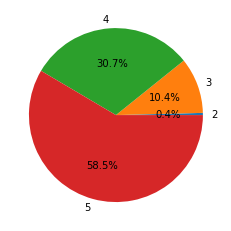

In [54]:
import matplotlib.pyplot as plt

plt.pie(user_lv_count.user_id.values, labels=user_lv_count.index.tolist(), autopct='%0.1f%%')
plt.show()

In [55]:
# 3.高潜用户年龄
user_age_count = high_dive.groupby('age').count()
user_age_count

,user_id,sex,user_lv_cd,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num,last_order,first_order,interval
age,,,,,,,,,,,,
-1.0,531,531,531,531,531,531,531,531,531,531,531,531
2.0,480,480,480,480,480,480,480,480,480,480,480,480
3.0,3089,3089,3089,3089,3089,3089,3089,3089,3089,3089,3089,3089
4.0,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609
5.0,147,147,147,147,147,147,147,147,147,147,147,147
6.0,93,93,93,93,93,93,93,93,93,93,93,93


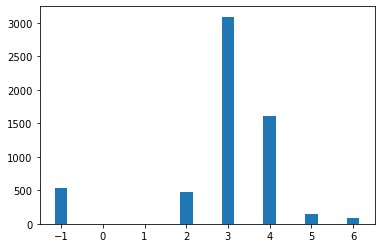

In [56]:
plt.bar(user_age_count.index.tolist(), user_age_count.user_id.values, width=0.3)
plt.show()

In [57]:
# 4.购买数量分析
buy_num_groups = pd.cut(high_dive['buy_num'], bins=[0,1,2,3,4,5,10,20,30,40,50])
buy_num_groups

0        (0, 1]
1        (3, 4]
2        (3, 4]
3        (0, 1]
4       (5, 10]
         ...   
5944     (0, 1]
5945     (3, 4]
5946    (5, 10]
5947     (2, 3]
5948     (1, 2]
Name: buy_num, Length: 5949, dtype: category
Categories (10, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (10, 20] < (20, 30] < (30, 40] < (40, 50]]

In [59]:
group_count = high_dive.groupby(buy_num_groups).count()
group_count

,user_id,age,sex,user_lv_cd,browse_num,addcart_num,delcart_num,buy_num,favor_num,click_num,last_order,first_order,interval
buy_num,,,,,,,,,,,,,
"(0, 1]",2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434
"(1, 2]",1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549
"(2, 3]",955,955,955,955,955,955,955,955,955,955,955,955,955
"(3, 4]",495,495,495,495,495,495,495,495,495,495,495,495,495
"(4, 5]",238,238,238,238,238,238,238,238,238,238,238,238,238
"(5, 10]",216,216,216,216,216,216,216,216,216,216,216,216,216
"(10, 20]",47,47,47,47,47,47,47,47,47,47,47,47,47
"(20, 30]",11,11,11,11,11,11,11,11,11,11,11,11,11
"(30, 40]",3,3,3,3,3,3,3,3,3,3,3,3,3


In [60]:
# 占比
group_count['rate'] = ['%.3f%%'%(value/high_dive.shape[0]*100) for value in group_count['buy_num']]
group_count['rate']

buy_num
(0, 1]      40.914%
(1, 2]      26.038%
(2, 3]      16.053%
(3, 4]       8.321%
(4, 5]       4.001%
(5, 10]      3.631%
(10, 20]     0.790%
(20, 30]     0.185%
(30, 40]     0.050%
(40, 50]     0.017%
Name: rate, dtype: object

In [61]:
# 5.找到高潜用户的购买记录
buy_history = data_cate4[data_cate4['user_id'].isin(high_hive_user.index.tolist())]
buy_history

,user_id,sku_id,type,time,cate
3926,301032.0,7199,4,2016-02-01 00:11:00,4
11152,260731.0,113675,4,2016-02-01 00:36:00,4
44215,281727.0,163680,4,2016-02-01 06:44:00,4
55187,223970.0,165290,4,2016-02-01 07:54:00,4
59875,280291.0,63231,4,2016-02-01 08:15:00,4
...,...,...,...,...,...
50413995,287501.0,117882,4,2016-04-15 21:11:00,4
50417513,203988.0,138037,4,2016-04-15 21:14:00,4
50501527,240526.0,70936,4,2016-04-15 22:23:00,4
50535758,294379.0,129598,4,2016-04-15 22:50:00,4


In [62]:
# 6.高潜用户在一周的哪一天购买
buy_history['weekday'] = buy_history['time'].astype('datetime64').apply(lambda x: x.weekday()+1)
buy_history

C:\Users\LXF\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,sku_id,type,time,cate,weekday
3926,301032.0,7199,4,2016-02-01 00:11:00,4,1
11152,260731.0,113675,4,2016-02-01 00:36:00,4,1
44215,281727.0,163680,4,2016-02-01 06:44:00,4,1
55187,223970.0,165290,4,2016-02-01 07:54:00,4,1
59875,280291.0,63231,4,2016-02-01 08:15:00,4,1
...,...,...,...,...,...,...
50413995,287501.0,117882,4,2016-04-15 21:11:00,4,5
50417513,203988.0,138037,4,2016-04-15 21:14:00,4,5
50501527,240526.0,70936,4,2016-04-15 22:23:00,4,5
50535758,294379.0,129598,4,2016-04-15 22:50:00,4,5


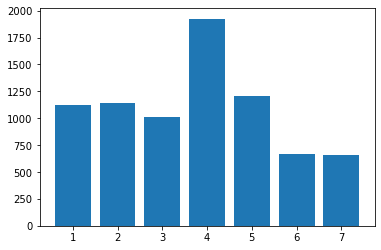

In [63]:
weekday_count = buy_history.groupby('weekday').count()
plt.bar(weekday_count.index.tolist(), weekday_count.user_id.values)
plt.show()